In [1]:
## import packages 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
## read GDP dataset  as 'gdp_df' DataFrame 

In [4]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [5]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


In [6]:
## inspect the first 10 rows and last 10 rows

In [7]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [9]:
## drop the 'Value Footnotes' column
## rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})

### How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

- 7176 rows 
- 3 columns 
- columns - indexes.base.Index

In [12]:
print(gdp_df.head())
rows = len(gdp_df.axes[0])
cols = len(gdp_df.axes[1])

print("\nRows: ", rows)
print("Columns: ", cols)

print(type(gdp_df.axes[0]))
print(type(gdp_df.axes[1]))

# If any of the columns are not the expected types, figure out why and fix it

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978

Rows:  7176
Columns:  3
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>


### Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The dataset starts from year 2020 and ends at year 1990, and it appears that there's an interval of one year. But there are 7176 observations in the dataset. 

In [13]:
print(gdp_df['Year'])

0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
7171    1994
7172    1993
7173    1992
7174    1991
7175    1990
Name: Year, Length: 7176, dtype: int64


### How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

- Number of countries: 242
- Least represented counties: Somalia and Djibouti with 8. They might have few observations because it is a third-world country with minimum resources or an unsafe government.  



In [14]:
# count how many countries are represented in dataset 
num_countries = len(gdp_df['Country'].unique())
print("Number of countries: ", num_countries)

# count occurrences of each country 
countries_count = gdp_df['Country'].value_counts()
print("\nCountry counts:")
print(countries_count)

# count of least represented countries (min)
countries_min = countries_count[countries_count == countries_count.min()]
print("\nLeast represented countries:")
print(countries_min)

Number of countries:  242

Country counts:
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

Least represented countries:
Somalia     8
Djibouti    8
Name: Country, dtype: int64


In [15]:
# create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [16]:
gdp_2014 = gdp_df[gdp_df["Year"] == 2014] ## integer so no quotation marks
print(gdp_2014)

                          Country  Year  GDP_Per_Capita
6                     Afghanistan  2014     2102.384604
25    Africa Eastern and Southern  2014     3677.319414
56     Africa Western and Central  2014     4215.646000
87                        Albania  2014    11586.833878
118                       Algeria  2014    11512.690472
...                           ...   ...             ...
7031                      Vietnam  2014     7601.858491
7062           West Bank and Gaza  2014     5967.073437
7089                        World  2014    15224.439424
7120                       Zambia  2014     3450.037600
7151                     Zimbabwe  2014     2357.651166

[242 rows x 3 columns]


In [17]:
# Use `.describe()` to find the summary statistics for GDP per capita in 2014.

print(gdp_2014["GDP_Per_Capita"].describe())

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP_Per_Capita, dtype: float64


### Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

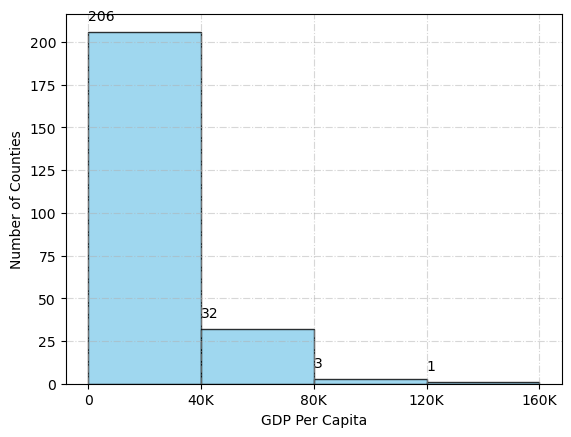

In [66]:
# create histogram plot
hist, bins, _ = plt.hist(gdp_2014["GDP_Per_Capita"], bins = 4, color = 'skyblue', edgecolor = 'black', range = (0, 160000), alpha = 0.8) #alpha = transparency
plt.ylabel('Number of Counties')
plt.xlabel('GDP Per Capita')
plt.grid(True, linestyle='-.',alpha=0.5)

# customize tick marks 
x_labels = [0, 40000,80000,120000,160000]
plt.xticks(x_labels, labels = [0,'40K','80K','120K','160K'])

# label the # of items in each bin 
for i in range(len(bins)-1): 
    plt.text(bins[i]+0.5,hist[i]+5, str(int(hist[i])), ha='left',va='bottom')
    
# change the size of histogram to fit bin labels
# plt.figure(figsize=(10,40)) # (Width, height), doesn't seem to have any changes

plt.show()